In [1]:
import silq
silq.initialize('Antimony')

%matplotlib notebook

Initializing imports
Initializing functions
Initializing instruments
Initializing parameters
Initializing data
Initialization complete


silq.config.antimony.save(os.path.join(silq.config.folder, 'config'), save_as_dir=True)

In [ ]:
ch_name = 'RDS'
ch = 8
ratio = 4
max_voltage = 2
SIM900.define_slot(channel=ch, name=ch_name+'_raw', max_voltage=max_voltage*ratio)
param_raw = SIM900.parameters[ch_name+'_raw']
param = ScaledParameter(param_raw, name=ch_name, label=ch_name, ratio=ratio)
SIM900_scaled_parameters.append(param)
RDS = param

In [38]:
RDS(0)

# Turnon

In [2]:
vals = list(np.arange(0, 1.4, 0.002))
len(vals)

700

DataSet:
   location = '2017-05-04/#003_turnon_10-50-32'
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Setpoint | TG_LB_RB_set | TG_LB_RB     | (700,)
   Measured | DC_voltage   | DC_voltage   | (700,)


<IPython.core.display.Javascript object>


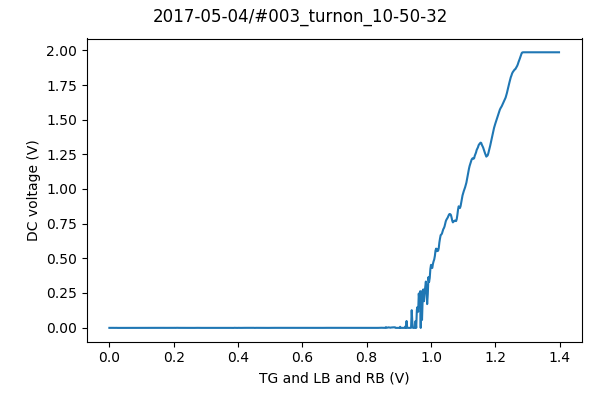

setting active
deactivating
DataSet:
   location = '2017-05-04/#003_turnon_10-50-32'
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Setpoint | TG_LB_RB_set | TG_LB_RB     | (700,)
   Measured | DC_voltage   | DC_voltage   | (700,)
started at 2017-05-04 10:56:42


In [3]:
DC_parameter.setup()
loop = Loop(turnon_parameter[vals]).each(
    DC_parameter).then(
    Task(layout.stop))
data = loop.get_data_set(name='turnon')
print(data)
plot = MatPlot(data.DC_voltage)
loop.with_bg_task(plot.update, min_delay=0.5)
loop.run();

# Pinchoff

In [3]:
pinchoff_parameter = RB
turnon_parameter(1.1)

vals = list(np.arange(1.1, 0, -0.002))
len(vals)

550

DataSet:
   location = '2017-05-04/#005_pinchoff_RB_11-04-37'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | RB_set     | RB           | (550,)
   Measured | DC_voltage | DC_voltage   | (550,)


<IPython.core.display.Javascript object>


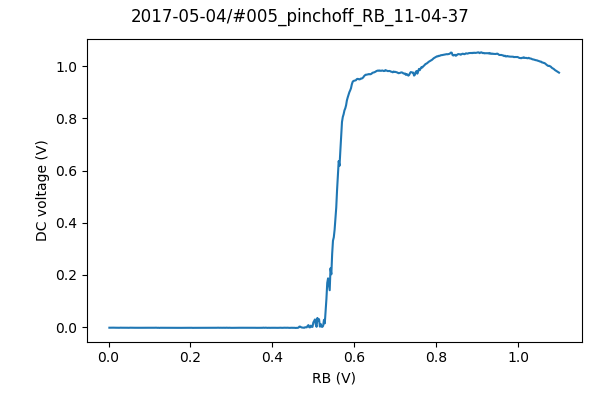

deactivating
DataSet:
   location = '2017-05-04/#005_pinchoff_RB_11-04-37'
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | RB_set     | RB           | (550,)
   Measured | DC_voltage | DC_voltage   | (550,)
started at 2017-05-04 11:06:46


In [4]:
DC_parameter.setup()
loop = Loop(pinchoff_parameter[vals]).each(
    DC_parameter).then(
    Task(layout.stop))
data = loop.get_data_set(name=f'pinchoff_{pinchoff_parameter.name}')
plot = MatPlot(data.DC_voltage)
loop.with_bg_task(plot.update, min_delay=0.5)
loop.run();

# 1D Coulomb

In [28]:
LB(0.45)
RB(0.45)
SRC(0.15)
TG(1.4)

In [31]:
parameter = DS
vals = list(np.arange(0, 1, 0.0005))
len(vals)

2000

DataSet:
   data = load_data('2017-05-04/#019_1D_coulomb_DS_11-58-43')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | DS_set     | DS           | (2000,)
   Measured | DC_voltage | DC_voltage   | (2000,)


<IPython.core.display.Javascript object>


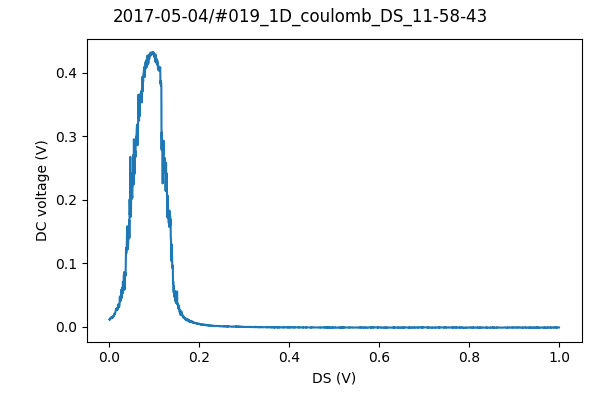

DataSet:
   data = load_data('2017-05-04/#019_1D_coulomb_DS_11-58-43')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | DS_set     | DS           | (2000,)
   Measured | DC_voltage | DC_voltage   | (2000,)
deactivating
DataSet:
   data = load_data('2017-05-04/#019_1D_coulomb_DS_11-58-43')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | DS_set     | DS           | (2000,)
   Measured | DC_voltage | DC_voltage   | (2000,)
started at 2017-05-04 12:02:14


In [32]:
DC_parameter.setup()
loop = Loop(parameter[vals]).each(
    DC_parameter).then(
    Task(layout.stop))
data = loop.get_data_set(name=f'1D_coulomb_{parameter.name}')
plot = MatPlot(data.DC_voltage)
loop.with_bg_task(plot.update, min_delay=0.5)
loop.run();
parameter(vals[0])

# 2D scans

In [43]:
x_vals = LB[np.arange(0.35,0.7, 0.002).tolist()]
y_vals = RB[np.arange(0.35,0.7, 0.002).tolist()]
print(f'Points: X{len(x_vals)} x Y{len(y_vals)}')

Points: X175 x Y175


DataSet:
   data = load_data('2017-05-04/#021_2D_DC_LB_RB_12-10-36')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | LB_set     | LB           | (175,)
   Setpoint | RB_set     | RB           | (175, 175)
   Measured | DC_voltage | DC_voltage   | (175, 175)


<IPython.core.display.Javascript object>


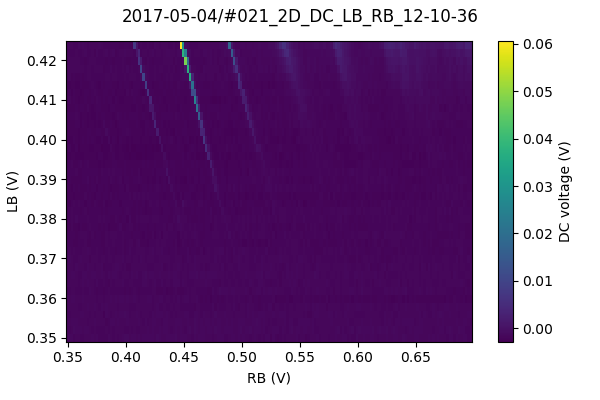

DataSet:
   data = load_data('2017-05-04/#021_2D_DC_LB_RB_12-10-36')
   <Type>   | <array_id> | <array.name> | <array.shape>
   Setpoint | LB_set     | LB           | (175,)
   Setpoint | RB_set     | RB           | (175, 175)
   Measured | DC_voltage | DC_voltage   | (175, 175)


In [ ]:
DC_parameter.setup()
loop = Loop(x_vals).loop(
    y_vals).each(
        DC_parameter).then(
            Task(layout.stop))
data = loop.get_data_set(name=f'2D_DC_{x_vals.name}_{y_vals.name}')
plot = MatPlot(data.DC_voltage)
loop.actions[0].with_bg_task(plot.update, min_delay=0.5)
loop.run();